<center>
  <img src="https://i.imgur.com/zze0EHS.png" alt="giki Logo" width="200">
  <div>
  </center>
    <h1><strong>Arsalan Khan</strong></h1>
    <h3><strong>2022115</strong></h3>
    <h3><strong>CS 351L - AI Lab 8 Application</strong></h3>
    <h3><strong>BS Cybersecurity - 5th Semester</strong></h3>
    <h3><strong>Submitted to: Sir Usama Arshad, PhD CS</strong></h3>
  </div>


---

# **Housing Price Prediction Using Neural Networks**

---



In this notebook, we will build a model to predict housing prices using a dataset from the UCI Machine Learning Repository. We will process the data, split it into training and testing sets, and then train a neural network model using Keras and TensorFlow. Additionally, we will make the model's predictions interactive using widgets, allowing for real-time prediction based on user inputs.

We'll also visualize the model's predictions, evaluate its performance, and explore how the model learns during training. By the end, you will have a working, interactive tool that predicts housing prices based on several key features.

## Steps:
1. **Data Processing**: Load the dataset, handle missing values, and scale the features.
2. **Model Building**: Create a neural network for price prediction.
3. **Evaluation**: Assess the model's performance using metrics like MAE, MSE, and RMSE.
4. **Interactive Prediction**: Use widgets to allow real-time predictions with user input.
5. **Visualization**: Display various plots showing model performance and feature relationships.


### 1. Import Libraries and Load Dataset
This section imports the necessary libraries and loads the housing dataset from a URL. It also handles missing values and sets appropriate column names.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import ipywidgets as widgets
from ipywidgets import interact

# URL of the dataset (replace with the correct link)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"

# Load the dataset directly from the URL
df = pd.read_csv(url, header=None)

# Set the appropriate column names
df.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Price',
              'OtherFeature1', 'OtherFeature2', 'OtherFeature3', 'OtherFeature4', 'OtherFeature5']

# Handle missing values (if any) by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Define features and target
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X = df[features]
y = df['Price']


### 2. Train-Test Split and Feature Scaling
In this section, we split the data into training and testing sets and then apply feature scaling using `StandardScaler` to standardize the feature values for better model performance.


In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Build, Compile, and Train the Neural Network
Here, we build a simple neural network using Keras, compile it, and then train it on the scaled training data.


In [58]:
from tensorflow.keras.layers import Input

# Build and compile a simple neural network model with Input layer
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))  # Equivalent to input_dim=X_train_scaled.shape[1]
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 156.7489
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 136.2728
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 141.9829
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 119.6318
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 95.6349
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67.2454
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.7377
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43.9147
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.2623
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.8629
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.0899
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.4933
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.2497 
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.4059
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.405

### 4. Model Evaluation and Metrics Calculation

---


This section evaluates the trained model using evaluation metrics such as MAE, MSE, and RMSE on the test set.


In [59]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = np.mean(np.abs(y_pred.flatten() - y_test[:len(y_pred)]))  # Flatten y_pred if necessary
mse = np.mean((y_pred.flatten() - y_test[:len(y_pred)]) ** 2)
rmse = np.sqrt(mse)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Absolute Error (MAE): 2.545291926346573
Mean Squared Error (MSE): 16.44099883220773
Root Mean Squared Error (RMSE): 4.054750156570406


## 5. Plotting Results (Prediction Errors & Actual vs Predicted)

---


In this section, we visualize the model's performance by plotting the distribution of errors and comparing predicted vs actual house prices.


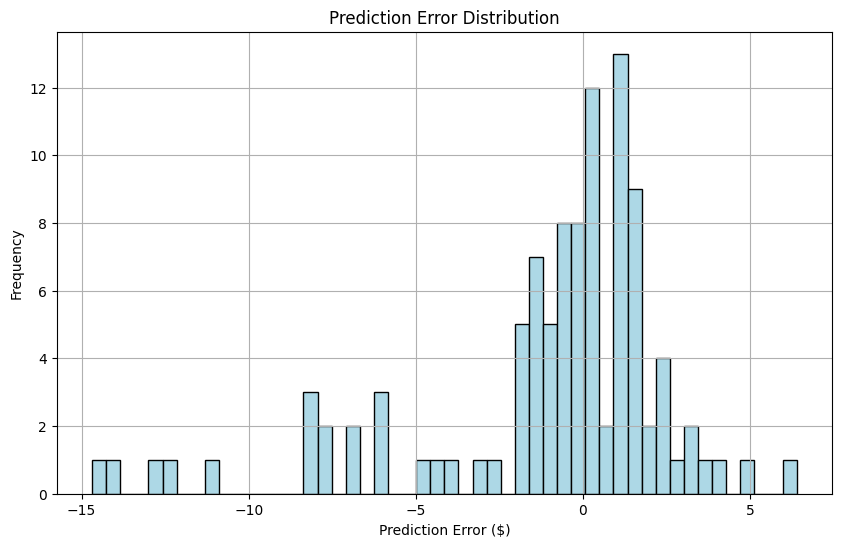

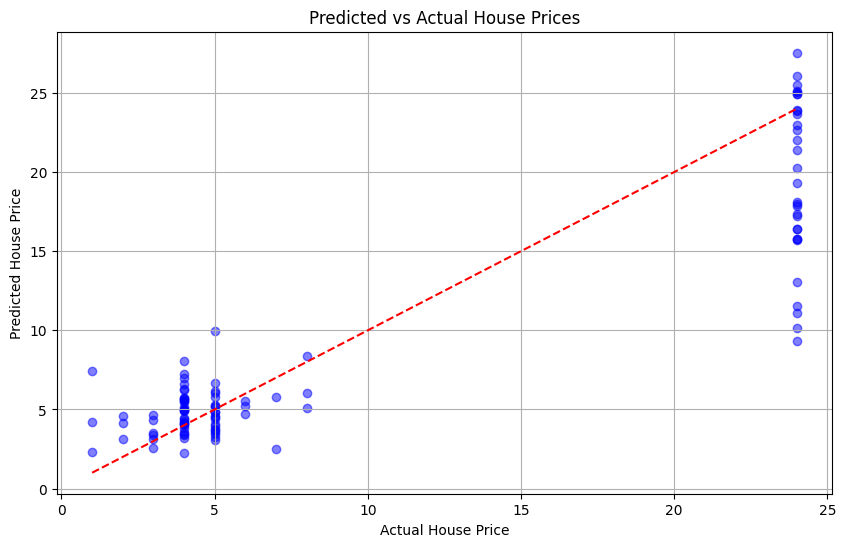

In [64]:
# Plot the difference between predicted and actual prices (errors)
errors = y_pred.flatten() - y_test[:len(y_pred)]

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='lightblue', edgecolor='black')
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Simple scatter plot for better understanding
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:len(y_pred)], y_pred.flatten(), color='blue', alpha=0.5)
plt.title('Predicted vs Actual House Prices')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')

# Add an identity line for better comparison
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.grid(True)
plt.show()


## 6. Plot Training Loss Curve

---


This section visualizes the model’s training loss over the epochs to understand how well the model is learning.


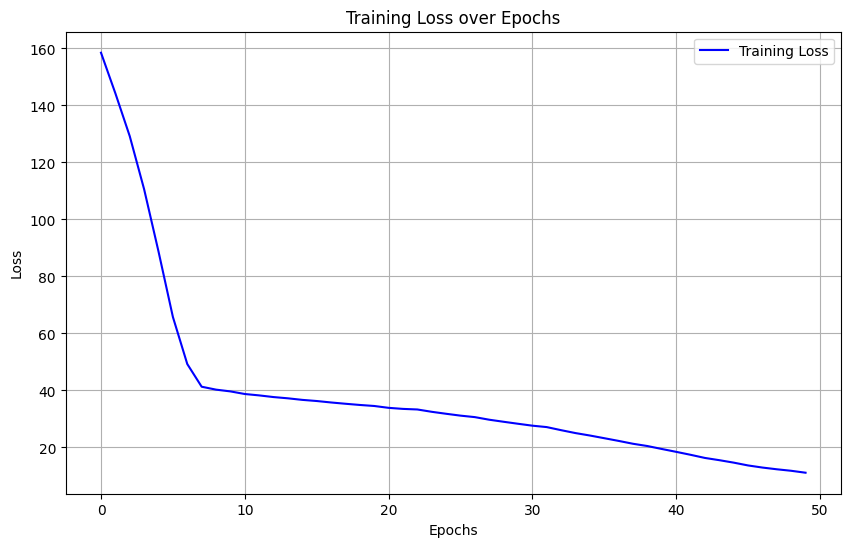

In [65]:
# Plot the training loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## 7. Interactive Prediction with Widgets

---


This section allows users to input values interactively using sliders and get real-time predictions with corresponding plots.


In [85]:
import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd
import matplotlib.pyplot as plt

# Function to make predictions and plot results
def make_prediction_plot(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude):
    # Create a new data point with the input values as a pandas DataFrame to preserve feature names
    new_house = pd.DataFrame([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]],
                             columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])

    # Standardize the new data point using the same scaler
    new_house_scaled = scaler.transform(new_house)

    # Predict the price using the trained model
    predicted_price = model.predict(new_house_scaled)

    # Print the predicted price
    print(f"Predicted House Price: ${predicted_price[0][0]:,.2f}")

    # Plot the feature vs predicted price relationship
    features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
    feature_values = [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]

    plt.figure(figsize=(10, 6))
    plt.bar(features, feature_values, color='lightblue', edgecolor='black')
    plt.title(f'Feature Values for Predicted Price: ${predicted_price[0][0]:,.2f}')
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

# Define widgets with custom styling
style = {'description_width': '150px'}
layout = widgets.Layout(width='500px')

MedInc = widgets.FloatSlider(value=7.0, min=0.0, max=15.0, step=0.1, description='Median Income:', style=style, layout=layout)
HouseAge = widgets.FloatSlider(value=20.0, min=0.0, max=100.0, step=1.0, description='House Age:', style=style, layout=layout)
AveRooms = widgets.FloatSlider(value=6.0, min=0.0, max=10.0, step=0.1, description='Average Rooms:', style=style, layout=layout)
AveBedrms = widgets.FloatSlider(value=3.0, min=0.0, max=6.0, step=0.1, description='Average Bedrooms:', style=style, layout=layout)
Population = widgets.FloatSlider(value=100.0, min=0.0, max=2000.0, step=50.0, description='Population:', style=style, layout=layout)
AveOccup = widgets.FloatSlider(value=7.0, min=0.0, max=10.0, step=0.1, description='Average Occupants:', style=style, layout=layout)
Latitude = widgets.FloatSlider(value=37.0, min=35.0, max=40.0, step=0.1, description='Latitude:', style=style, layout=layout)
Longitude = widgets.FloatSlider(value=-115.0, min=-125.0, max=-115.0, step=0.1, description='Longitude:', style=style, layout=layout)

# Organize widgets into a grid layout
inputs = widgets.VBox([
    widgets.HBox([MedInc, HouseAge]),
    widgets.HBox([AveRooms, AveBedrms]),
    widgets.HBox([Population, AveOccup]),
    widgets.HBox([Latitude, Longitude])
])

# Display interactive plot with organized widgets
interact(make_prediction_plot, MedInc=MedInc, HouseAge=HouseAge, AveRooms=AveRooms, AveBedrms=AveBedrms,
         Population=Population, AveOccup=AveOccup, Latitude=Latitude, Longitude=Longitude)


interactive(children=(FloatSlider(value=7.0, description='Median Income:', layout=Layout(width='500px'), max=1…

<function __main__.make_prediction_plot(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude)>

## **Task Summary**

---



In this task, we have built a neural network model to predict house prices based on various features such as median income, house age, average rooms, population, and more. Here's a summary of what we did:

1. **Data Loading and Preprocessing**:
    - We loaded the dataset and handled missing values by filling them with the column mean.
    - We scaled the features using `StandardScaler` to ensure all features have similar magnitudes, which helps the neural network learn effectively.

2. **Model Building and Training**:
    - We created a simple neural network using Keras with two hidden layers. The model was compiled with the Adam optimizer and trained using mean squared error (MSE) as the loss function.
    - We trained the model on the processed data and evaluated its performance using the test set.

3. **Model Evaluation**:
    - After training, we evaluated the model's performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). These metrics help us understand how well the model is making predictions.

4. **Interactive Prediction**:
    - We created interactive widgets to allow users to input feature values in real-time and predict house prices. The model updates its predictions dynamically based on user input.

5. **Visualization**:
    - We visualized the prediction errors, comparing the predicted vs actual prices, and plotted the training loss curve to show how the model improved over time.
    - We also created a feature plot to visualize the relationships between the input features and predicted house prices.

By the end of this task, we have a neural network model that can predict house prices based on user inputs and provide visual feedback on the results. This interactive tool can be used for further exploration and model improvement.




---


# ***End..***